<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/CNN_for_Noise_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo simples de classificação de tipo de ruido em imagens

#### Luis Ricardo Arantes Filho
#### Luan Bingo

Gerador de Ruidos: Rubens Sautter:
An parameter of correction has been used (s):
FFT(f(w)) = gauss(0,std) * (1/w^beta)^(beta*s/2) 
Frequencies are measured in multidimensional space by the frequency euclidian distance.

Parameter for all noise types
size = 128
wn = cNoise(0,(size,size),maxCorrections=100,maxAvgError=0.001, eta=0.05)

#### Coordenador: Dr. Reinaldo R. Rosa
#### National Institute for Space Research

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#ls
%cd drive/MyDrive/INPE/CCN_For_Noise_Classification

/content/drive/MyDrive/INPE/CCN_For_Noise_Classification


In [10]:
import os 
import cv2

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

#Dataframes devem conter:
    #Imagens Full
    #Class


#caminho de images
path_img_1 = os.getcwd() + '/Noise_images/'

#lista de images
lista_p1 = os.listdir(path_img_1)
lista_p1.sort()

# =============================================================================
# #reading noise images
# =============================================================================
list_img = []
list_class = []

i = 0
for i in range(len(lista_p1)):
    image = cv2.imread(path_img_1+lista_p1[i])
    nome = lista_p1[i].split('.jpg')
    nome = nome[0].split('_')
    classe_noise = nome[3]
#     print(i)
#     print(classe_noise)

    list_img.append(image)
    list_class.append(classe_noise)

df_rect_1 = pd.DataFrame({'image_data':list_img, 'class':list_class})

In [13]:
df_rect_1

,image_data,class
0,"[[[154, 154, 154], [148, 148, 148], [138, 138,...",pn
1,"[[[159, 159, 159], [156, 156, 156], [153, 153,...",rn
2,"[[[96, 96, 96], [104, 104, 104], [143, 143, 14...",wn
3,"[[[121, 121, 121], [117, 117, 117], [103, 103,...",pn
4,"[[[83, 83, 83], [83, 83, 83], [82, 82, 82], [8...",rn
...,...,...
2995,"[[[89, 89, 89], [92, 92, 92], [97, 97, 97], [1...",rn
2996,"[[[122, 122, 122], [132, 132, 132], [142, 142,...",wn
2997,"[[[80, 80, 80], [81, 81, 81], [70, 70, 70], [7...",pn
2998,"[[[138, 138, 138], [140, 140, 140], [139, 139,...",rn


# GENERATE SETS

In [14]:
path_dataframe = os.getcwd() + '/Dataframes/'
##Salvar esse DF       
def salvaDataFrames_pkl(dataFrame,caminhoSaida,nomeArquivo):
    dataFrame.to_pickle(caminhoSaida+'/'+nomeArquivo, compression='infer')


salvaDataFrames_pkl(df_rect_1,path_dataframe,'Data_Frame_Noise_images.pkl')

In [15]:
#ADJUST IMG DIM
from PIL import Image
import cv2 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
image_list = []
i = 0
for i in range(len(df_rect_1)):
    print(i)
    #old_im = cv2.imread(df_rect_1.loc[i,'image_data'])    
    res = cv2.resize(df_rect_1.loc[i,'image_data'],(128,128),cv2.INTER_AREA)
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    print(gray.shape)
    image_list.append(gray)
    print(i)

A saída de streaming foi truncada nas últimas 5000 linhas.
(128, 128)
1333
1334
(128, 128)
1334
1335
(128, 128)
1335
1336
(128, 128)
1336
1337
(128, 128)
1337
1338
(128, 128)
1338
1339
(128, 128)
1339
1340
(128, 128)
1340
1341
(128, 128)
1341
1342
(128, 128)
1342
1343
(128, 128)
1343
1344
(128, 128)
1344
1345
(128, 128)
1345
1346
(128, 128)
1346
1347
(128, 128)
1347
1348
(128, 128)
1348
1349
(128, 128)
1349
1350
(128, 128)
1350
1351
(128, 128)
1351
1352
(128, 128)
1352
1353
(128, 128)
1353
1354
(128, 128)
1354
1355
(128, 128)
1355
1356
(128, 128)
1356
1357
(128, 128)
1357
1358
(128, 128)
1358
1359
(128, 128)
1359
1360
(128, 128)
1360
1361
(128, 128)
1361
1362
(128, 128)
1362
1363
(128, 128)
1363
1364
(128, 128)
1364
1365
(128, 128)
1365
1366
(128, 128)
1366
1367
(128, 128)
1367
1368
(128, 128)
1368
1369
(128, 128)
1369
1370
(128, 128)
1370
1371
(128, 128)
1371
1372
(128, 128)
1372
1373
(128, 128)
1373
1374
(128, 128)
1374
1375
(128, 128)
1375
1376
(128, 128)
1376
1377
(128, 128)
1377
1

In [16]:
labels = []
i=0
for i in range(len(df_rect_1.index)):
    #(0-white noise, 1-pink noise, 2- red noise)
    if df_rect_1.loc[i,'class'] == 'wn':
        labels.append(0)
    elif df_rect_1.loc[i,'class'] == 'pn':
        labels.append(1)
    elif df_rect_1.loc[i,'class'] == 'rn':
        labels.append(2)

labels = np.array(labels)

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

'''
Montar Conjunto de Treinamento - Testes IMAGENS ARTIFICIAIS
'''
#Dividindo Conjunto de treinamento e de Teste
X_train, X_test, y_train, y_test = train_test_split(
    np.asarray(image_list),
    np.asarray(labels),
    test_size=0.20, 
    shuffle=True,
    random_state=42,
)

# Scale images to the [0, 1] range
X_train = X_train.reshape(len(X_train),128,128,1) 
X_test = X_test.reshape(len(X_test),128,128,1)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(X_train.shape)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test, 3)

(2400, 128, 128, 1)


In [18]:
path_datasets = os.getcwd() + '/Sets/'

np.save(path_datasets + 'X_train.npy', X_train)
np.save(path_datasets + 'X_test.npy', X_test)
np.save(path_datasets + 'y_train.npy', y_train)
np.save(path_datasets + 'y_test.npy', y_test)

In [19]:
## TRAINING STEP
path_model = os.getcwd() + '/Model/'

In [20]:
'''
# =============================================================================
# NEURAL MODEL - CONVOLUTIONAL NEURAL NETWORK - SIMPLE - RETURNS POINTS (X,Y)
# =============================================================================
'''
from keras import layers
from keras import models
from keras import optimizers
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#from keras.models import Sequential
from tensorflow.keras.models import Sequential
#from keras.utils import multi_gpu_model
#from tensorflow.keras.utils import multi_gpu_model

'''
# =============================================================================
# TESTANDO OUTRAS ABORDAGENS -- O MELHOR MODELO - TEST 1
#=============================================================================
'''
model = keras.Sequential(
    [
        keras.Input(shape=(128,128,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(3, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_mse:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dropout (Dropout)           (None, 57600)             0

In [21]:
def salvarmodelo(nome,modelo):
    #Salvando
    filename = nome+'.sav'
    pickle.dump(modelo, open(filename, 'wb'))
    

def salvardicionario(nome, history):
    #Salvando Dicionario
    w = csv.writer(open(nome+".csv", "w"))
    for key, val in history.items():
        w.writerow([key, val])    
        
#Estatisticas do modelo
#cria dicionario
history_dict = history.history
history_dict.keys()
#Salvando Dicionario
salvardicionario(path_model+"History_noise_class",history_dict)
model.save(path_model+"Cnn_model_noise_class.h5")

In [22]:
## VERIFY STATS AND TRAINING
def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

def abreDataFramecsv(caminho,nomeArq):
    dataFrame = pd.read_csv(caminho + nomeArq,names=['Metrics','Values'])#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame


In [23]:
#ConvNet_1D_ARQ1_MULTIFILTRO
nome_History = 'History_noise_class.csv'
nome_Model = "Cnn_model_noise_class.h5"

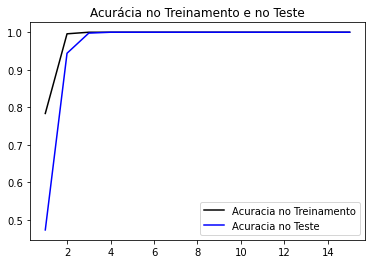

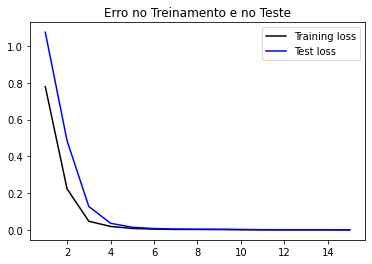

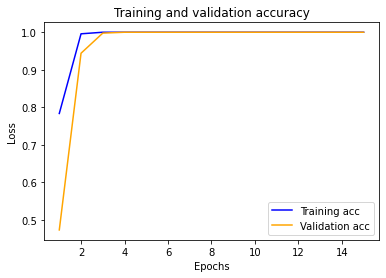

In [24]:
'''
Plotando as Curvas de Validação e de Erro - Aprendizado do Modelo
'''
history = abreDataFramecsv(path_model, nome_History)
#history = history.to_dict()
acc = history.loc[3,'Values']
val_acc = history.loc[1,'Values']
loss = history.loc[2,'Values']
val_loss = history.loc[0,'Values']

from ast import literal_eval

acc = literal_eval(acc)
val_acc = literal_eval(val_acc)
loss = literal_eval(loss)
val_loss = literal_eval(val_loss)


epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,'k', label='Acuracia no Treinamento')
plt.plot(epochs, val_acc, 'b', label='Acuracia no Teste')
plt.title('Acurácia no Treinamento e no Teste')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'k', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Erro no Treinamento e no Teste')
plt.legend()
plt.show()
 
plt.figure()
acc_values = acc
val_acc_values = val_acc
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc_values, 'orange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
'''
# =============================================================================
# COMPUTANDO ESTATISTICAS
# =============================================================================
'''
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import validation_curve

def computaStats_Classification(modelo,nome,X_a,y_a):
    print("Estatisticas do Modelo - "+nome)
    #predição
    y_pred = modelo.predict([X_a])
    y_true = y_a
    #Convert predictions classes to one hot vectors 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    #Convert validation observations to one hot vectors
    Y_true = np.argmax(y_a,axis = 1) 
    #MEAN SQUARE ERROR
    
    print("Erro medio quadratico: ", mean_squared_error(Y_true, Y_pred_classes))
    
    #Acurácia
    print("Acuracia: ", accuracy_score(Y_true, Y_pred_classes))
    
    #Precisão
    print("Precisao: ", precision_score(Y_true, Y_pred_classes,average=None))
    
    #Recall
    print("Recall: ", recall_score(Y_true, Y_pred_classes,average=None))
    
    #F1 - Score
    print("F1 -Score: ", f1_score(Y_true, Y_pred_classes,average=None))
    

computaStats_Classification(model,'ConvNet_Noise_Class - Treino',X_train,y_train)
# print("--------**********-------------***********---------------**************")
computaStats_Classification(model,'ConvNet_Noise_Class - Testes',X_test,y_test)

Estatisticas do Modelo - ConvNet_Noise_Class - Treino
Erro medio quadratico:  0.0
Acuracia:  1.0
Precisao:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F1 -Score:  [1. 1. 1.]
Estatisticas do Modelo - ConvNet_Noise_Class - Testes
Erro medio quadratico:  0.0
Acuracia:  1.0
Precisao:  [1. 1. 1.]
Recall:  [1. 1. 1.]
F1 -Score:  [1. 1. 1.]
